# Import Library dan Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Data Train
data = pd.read_csv("train.csv")
data.tail(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
print(data.shape)

(614, 13)


# Preprocessing

Encoding

In [ ]:
## Labelling 0 & 1 for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})

## Labelling 0 & 1 for Loan_Status
data.Loan_Status=data.Loan_Status.map({'Y':1,'N':0})

## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [ ]:
# Menghapus Kolom Loan_ID
data = data.drop(columns='Loan_ID', axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


Mencari dan menghapus missing value

In [ ]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_clean = data.dropna()
data_clean.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1


# Split Data

In [ ]:
X = data_clean.drop(columns='Loan_Status', axis=1) ## all the data in X (Train set)
y = data_clean['Loan_Status']  ## Loan status will be our Y
print(X.shape)
print(y.shape)

(480, 11)
(480,)


# Pemodelan dengan Decission Tree

In [ ]:
# Memulai Pemodelan Decission Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

## Grid search di decision tree

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid_dt = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':np.arange(1,10),}
scoring_metrics = ['accuracy', 'f1']

gs_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=cv_method, verbose=1, scoring=scoring_metrics, refit='accuracy')
gs_dt.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_dt.best_params_)
print("Best Score (Accuracy):", gs_dt.best_score_)
print("Best Score (F1 Macro):", gs_dt.cv_results_['mean_test_f1'][gs_dt.best_index_])

Fitting 30 folds for each of 27 candidates, totalling 810 fits
Best Parameters (Accuracy): {'criterion': 'gini', 'max_depth': 1}
Best Score (Accuracy): 0.8083333333333333
Best Score (F1 Macro): 0.876442379950864


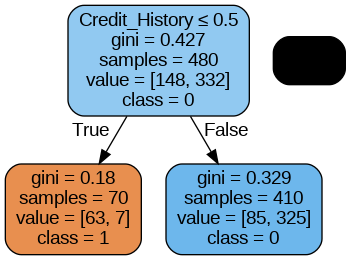

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
                 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Visualisasi pohon keputusan terbaik yang ditemukan oleh GridSearchCV
best_decision_tree = gs_dt.best_estimator_  # Mengambil model Decision Tree terbaik
dot_data = export_graphviz(best_decision_tree, out_file=None,
                           feature_names=feature_names,
                           class_names=['1','0'],
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("best_decision_tree.png")  # Simpan gambar pohon keputusan terbaik ke file
Image(graph.create_png())

# Pemodelan dengan K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()

cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
scoring_metrics = ['accuracy', 'f1']

gs_knn=GridSearchCV(model, param_grid=param_grid, scoring=scoring_metrics, cv=cv_method, refit='accuracy')
gs_knn.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_knn.best_params_)
print("Best Score (Accuracy):", gs_knn.best_score_)
print("Best Score F1:", gs_knn.cv_results_['mean_test_f1'][gs_knn.best_index_])

Best Parameters (Accuracy): {'n_neighbors': 49, 'weights': 'distance'}
Best Score (Accuracy): 0.6965277777777779
Best Score F1: 0.8153934191625732


# Pemodelan dengan Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
scoring_metrics = ['accuracy', 'f1']

gs_NB = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=cv_method,verbose=1,scoring=scoring_metrics, refit='accuracy')
gs_NB.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_NB.best_params_)
print("Best Score (Accuracy):", gs_NB.best_score_)
print("Best Score F1:", gs_NB.cv_results_['mean_test_f1'][gs_NB.best_index_])

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best Parameters (Accuracy): {'var_smoothing': 1.2328467394420635e-09}
Best Score (Accuracy): 0.7909722222222224
Best Score F1: 0.8606176010877238


# Pemodelan dengan Support Vector Machine

In [ ]:
#Liniear SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

SVM = LinearSVC()

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
scoring_metrics = ['accuracy', 'f1']

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


gs_SVM = GridSearchCV(estimator=SVM, param_grid =param_grid, cv=cv_method, n_jobs=-1, scoring=scoring_metrics, refit='accuracy')
gs_SVM.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_SVM.best_params_)
print("Best Score (Accuracy):", gs_SVM.best_score_ * 100)
print( "Best estimator accuracy on test set {:.2f} ".format(gs_SVM.best_estimator_.score(X, y) * 100 ) )
print("Best Score F1:", gs_SVM.cv_results_['mean_test_f1'][gs_SVM.best_index_])

Best Parameters (Accuracy): {'C': 175339164.093416}
Best Score (Accuracy): 63.81944444444443
Best estimator accuracy on test set 34.17 
Best Score F1: 0.7289739729613075


# Pemodelan dengan Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
scoring_metrics = ['accuracy', 'f1']

# Membuat parameter grid untuk solver dan max_iter
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 200, 300, 400, 500]}

# Membuat grid search CV dengan estimator dan parameter grid
gs_log_reg = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv_method, n_jobs=-1, scoring=scoring_metrics, refit='accuracy')

# Melakukan fitting dengan data X dan y
gs_log_reg.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi
print("Best Parameters (Accuracy):", gs_log_reg.best_params_)
print("Best Score (Accuracy):", gs_log_reg.best_score_ * 100)
print("Best estimator accuracy on test set {:.2f} ".format(gs_log_reg.best_estimator_.score(X, y) * 100 ) )
print("Best Score F1:", gs_log_reg.cv_results_['mean_test_f1'][gs_log_reg.best_index_])


Best Parameters (Accuracy): {'max_iter': 100, 'solver': 'liblinear'}
Best Score (Accuracy): 80.62499999999999
Best estimator accuracy on test set 80.83 
Best Score F1: 0.8748543214296637


# Pemodelan dengan Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Membuat estimator MLPClassifier
mlp = MLPClassifier()

In [ ]:
# Membuat parameter grid untuk hidden_layer_sizes, activation, solver dan learning_rate
param_grid = {'activation': ['tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam']}

cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
scoring_metrics = ['accuracy', 'f1']

# Membuat grid search CV dengan estimator dan parameter grid
gs_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv_method, n_jobs=-1, scoring=scoring_metrics, refit='accuracy')

# Melakukan fitting dengan data X dan y
gs_mlp.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi
print("Best Parameters (Accuracy):", gs_mlp.best_params_)
print("Best Score (Accuracy):", gs_mlp.best_score_ * 100)
print("Best estimator accuracy on test set {:.2f} ".format(gs_mlp.best_estimator_.score(X, y) * 100 ) )
print("Best Score F1:", gs_mlp.cv_results_['mean_test_f1'][gs_mlp.best_index_])

Best Parameters (Accuracy): {'activation': 'tanh', 'solver': 'adam'}
Best Score (Accuracy): 68.68055555555556
Best estimator accuracy on test set 69.79 
Best Score F1: 0.811756865254241


# Membuat model berdasarkan algoritma terbaik

In [ ]:
# Mencoba Logistic Regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 100, solver='liblinear', random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

#y_pred = logreg.predict(X_test)

LogisticRegression(random_state=16, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Prediksi label kelas pada data latih
y_train_pred = logreg.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", round(train_accuracy*100, 2), '%')

# Membuat confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)


# Prediksi label kelas pada data test
y_pred = logreg.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy*100, 2),'%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 81.39 %
Confusion Matrix (Training Data):
[[ 51  59]
 [  8 242]]
Test Accuracy: 79.17 %
Confusion Matrix:
[[13 25]
 [ 0 82]]


# Save model

In [ ]:
import pickle
# now you can save it to a file
file = './Model/LRmodel.pkl'
with open(file, 'wb') as f:
    pickle.dump(logreg, f)